In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('juice.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
cp = data.duplicated().sum()
ft = data.drop('quality',axis=1)
dft = ft.duplicated().sum()

print(f"doublons complet: {cp}")
print(f"doublons feature: {dft}")

doublons complet: 937
doublons feature: 937


In [7]:
data = data.drop_duplicates()
data.duplicated().value_counts()

False    3961
Name: count, dtype: int64

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
data.quality.value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

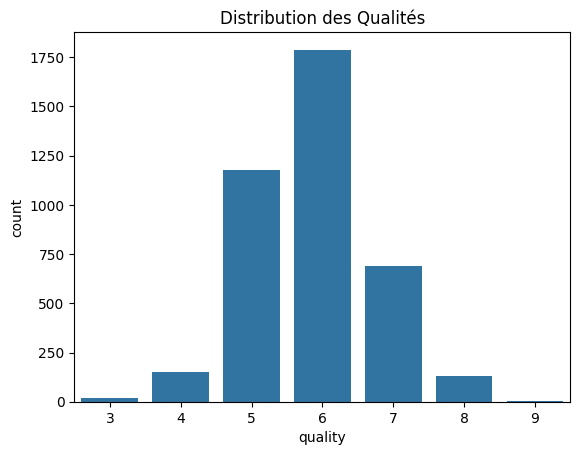

In [10]:
sns.countplot(data=data, x="quality")
plt.title("Distribution des Qualités")
plt.show()

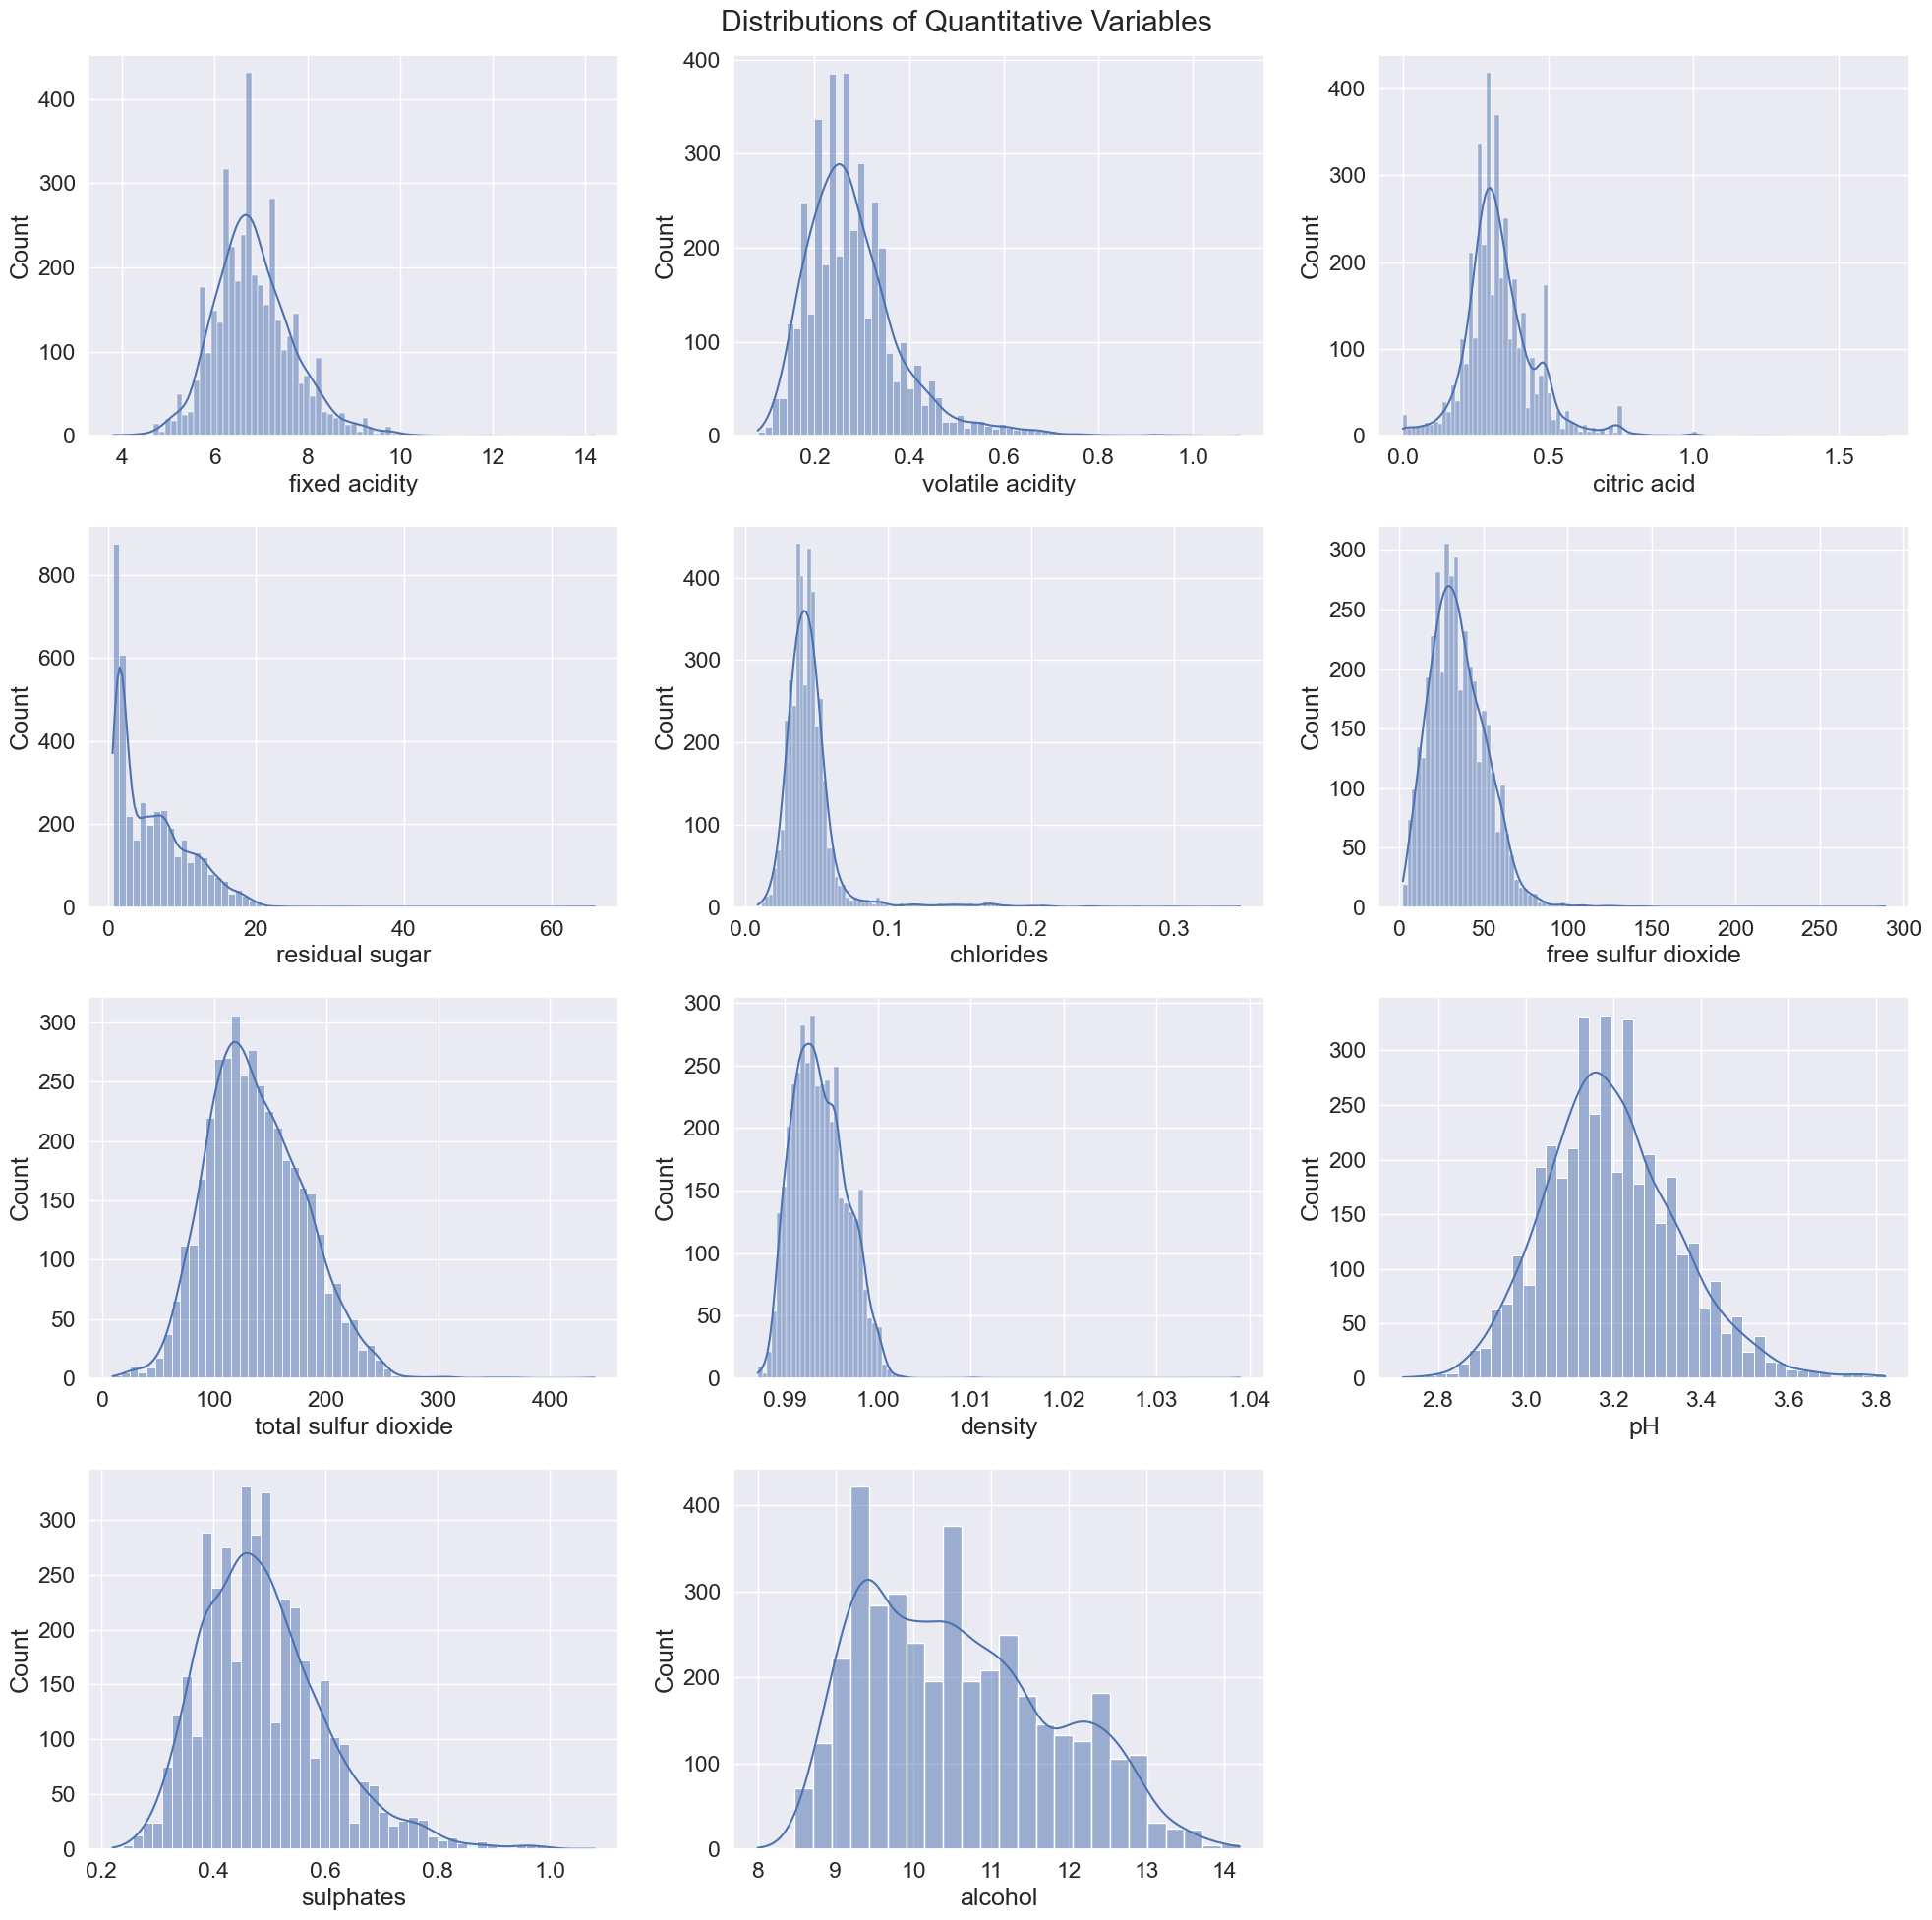

In [11]:
plt.figure(figsize=(20,20))
sns.set(font_scale = 1.5)

for i, col in enumerate(data.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.histplot(x = data[col], ax=ax, kde = True)

plt.suptitle('Distributions of Quantitative Variables')
plt.tight_layout()

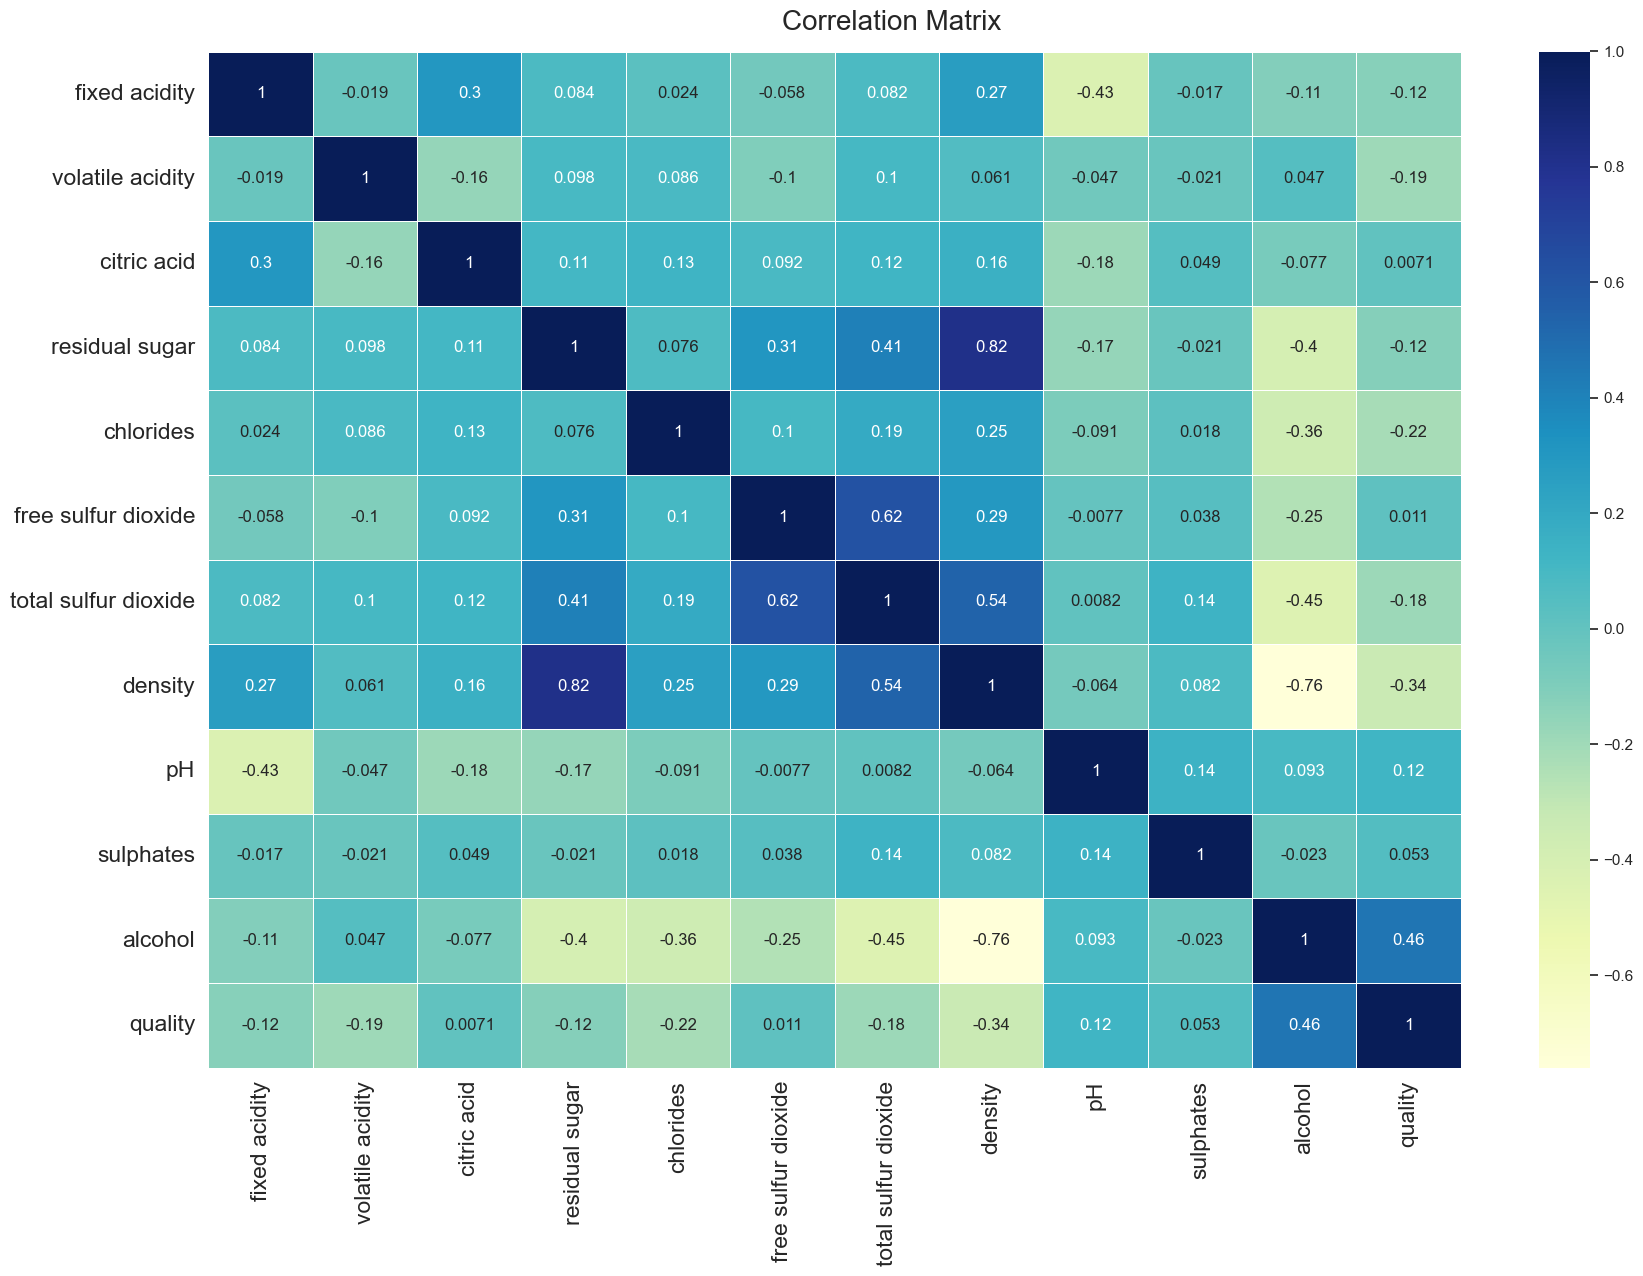

In [12]:
#8- Matrice de correlation
plt.subplots(figsize = (18,13))
sns.set(font_scale = 1)

hmap = sns.heatmap(data = data.corr(),
            annot = True,
            linewidths = .5,
            cmap = "YlGnBu"
            )


plt.suptitle("Correlation Matrix", fontsize = 20)
plt.tight_layout()

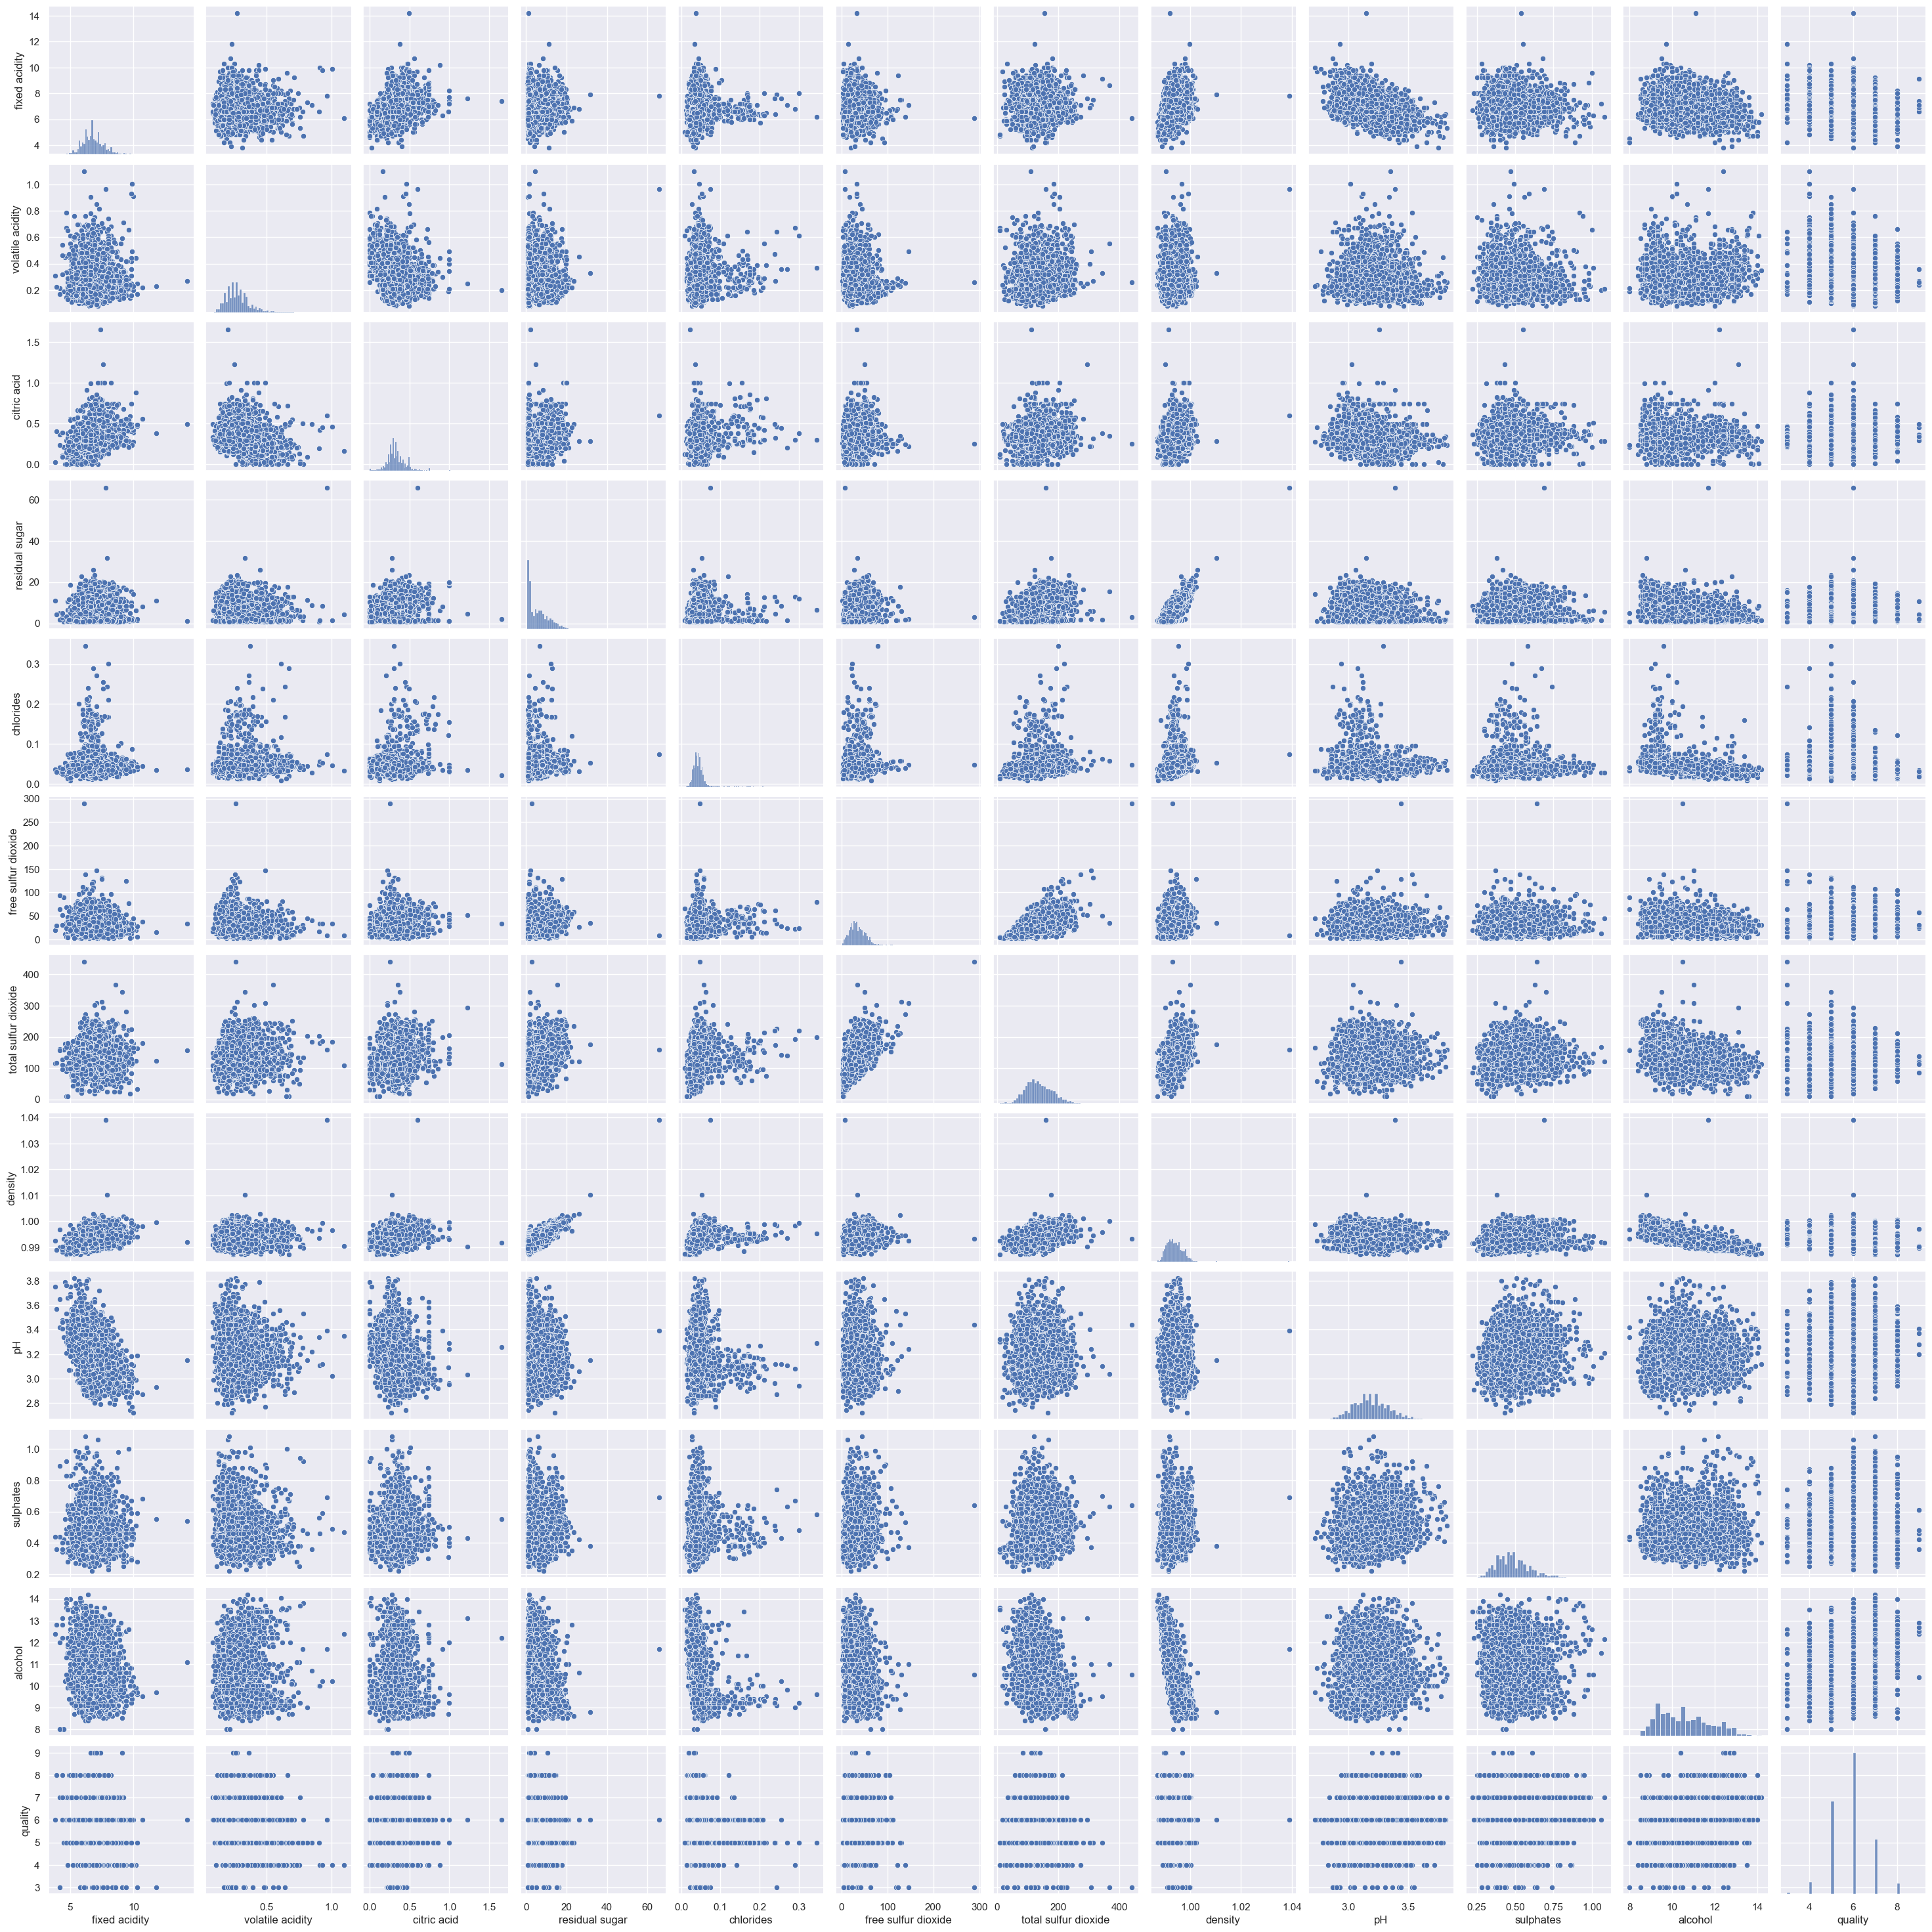

In [13]:
sns.pairplot(data.select_dtypes(include=np.number))

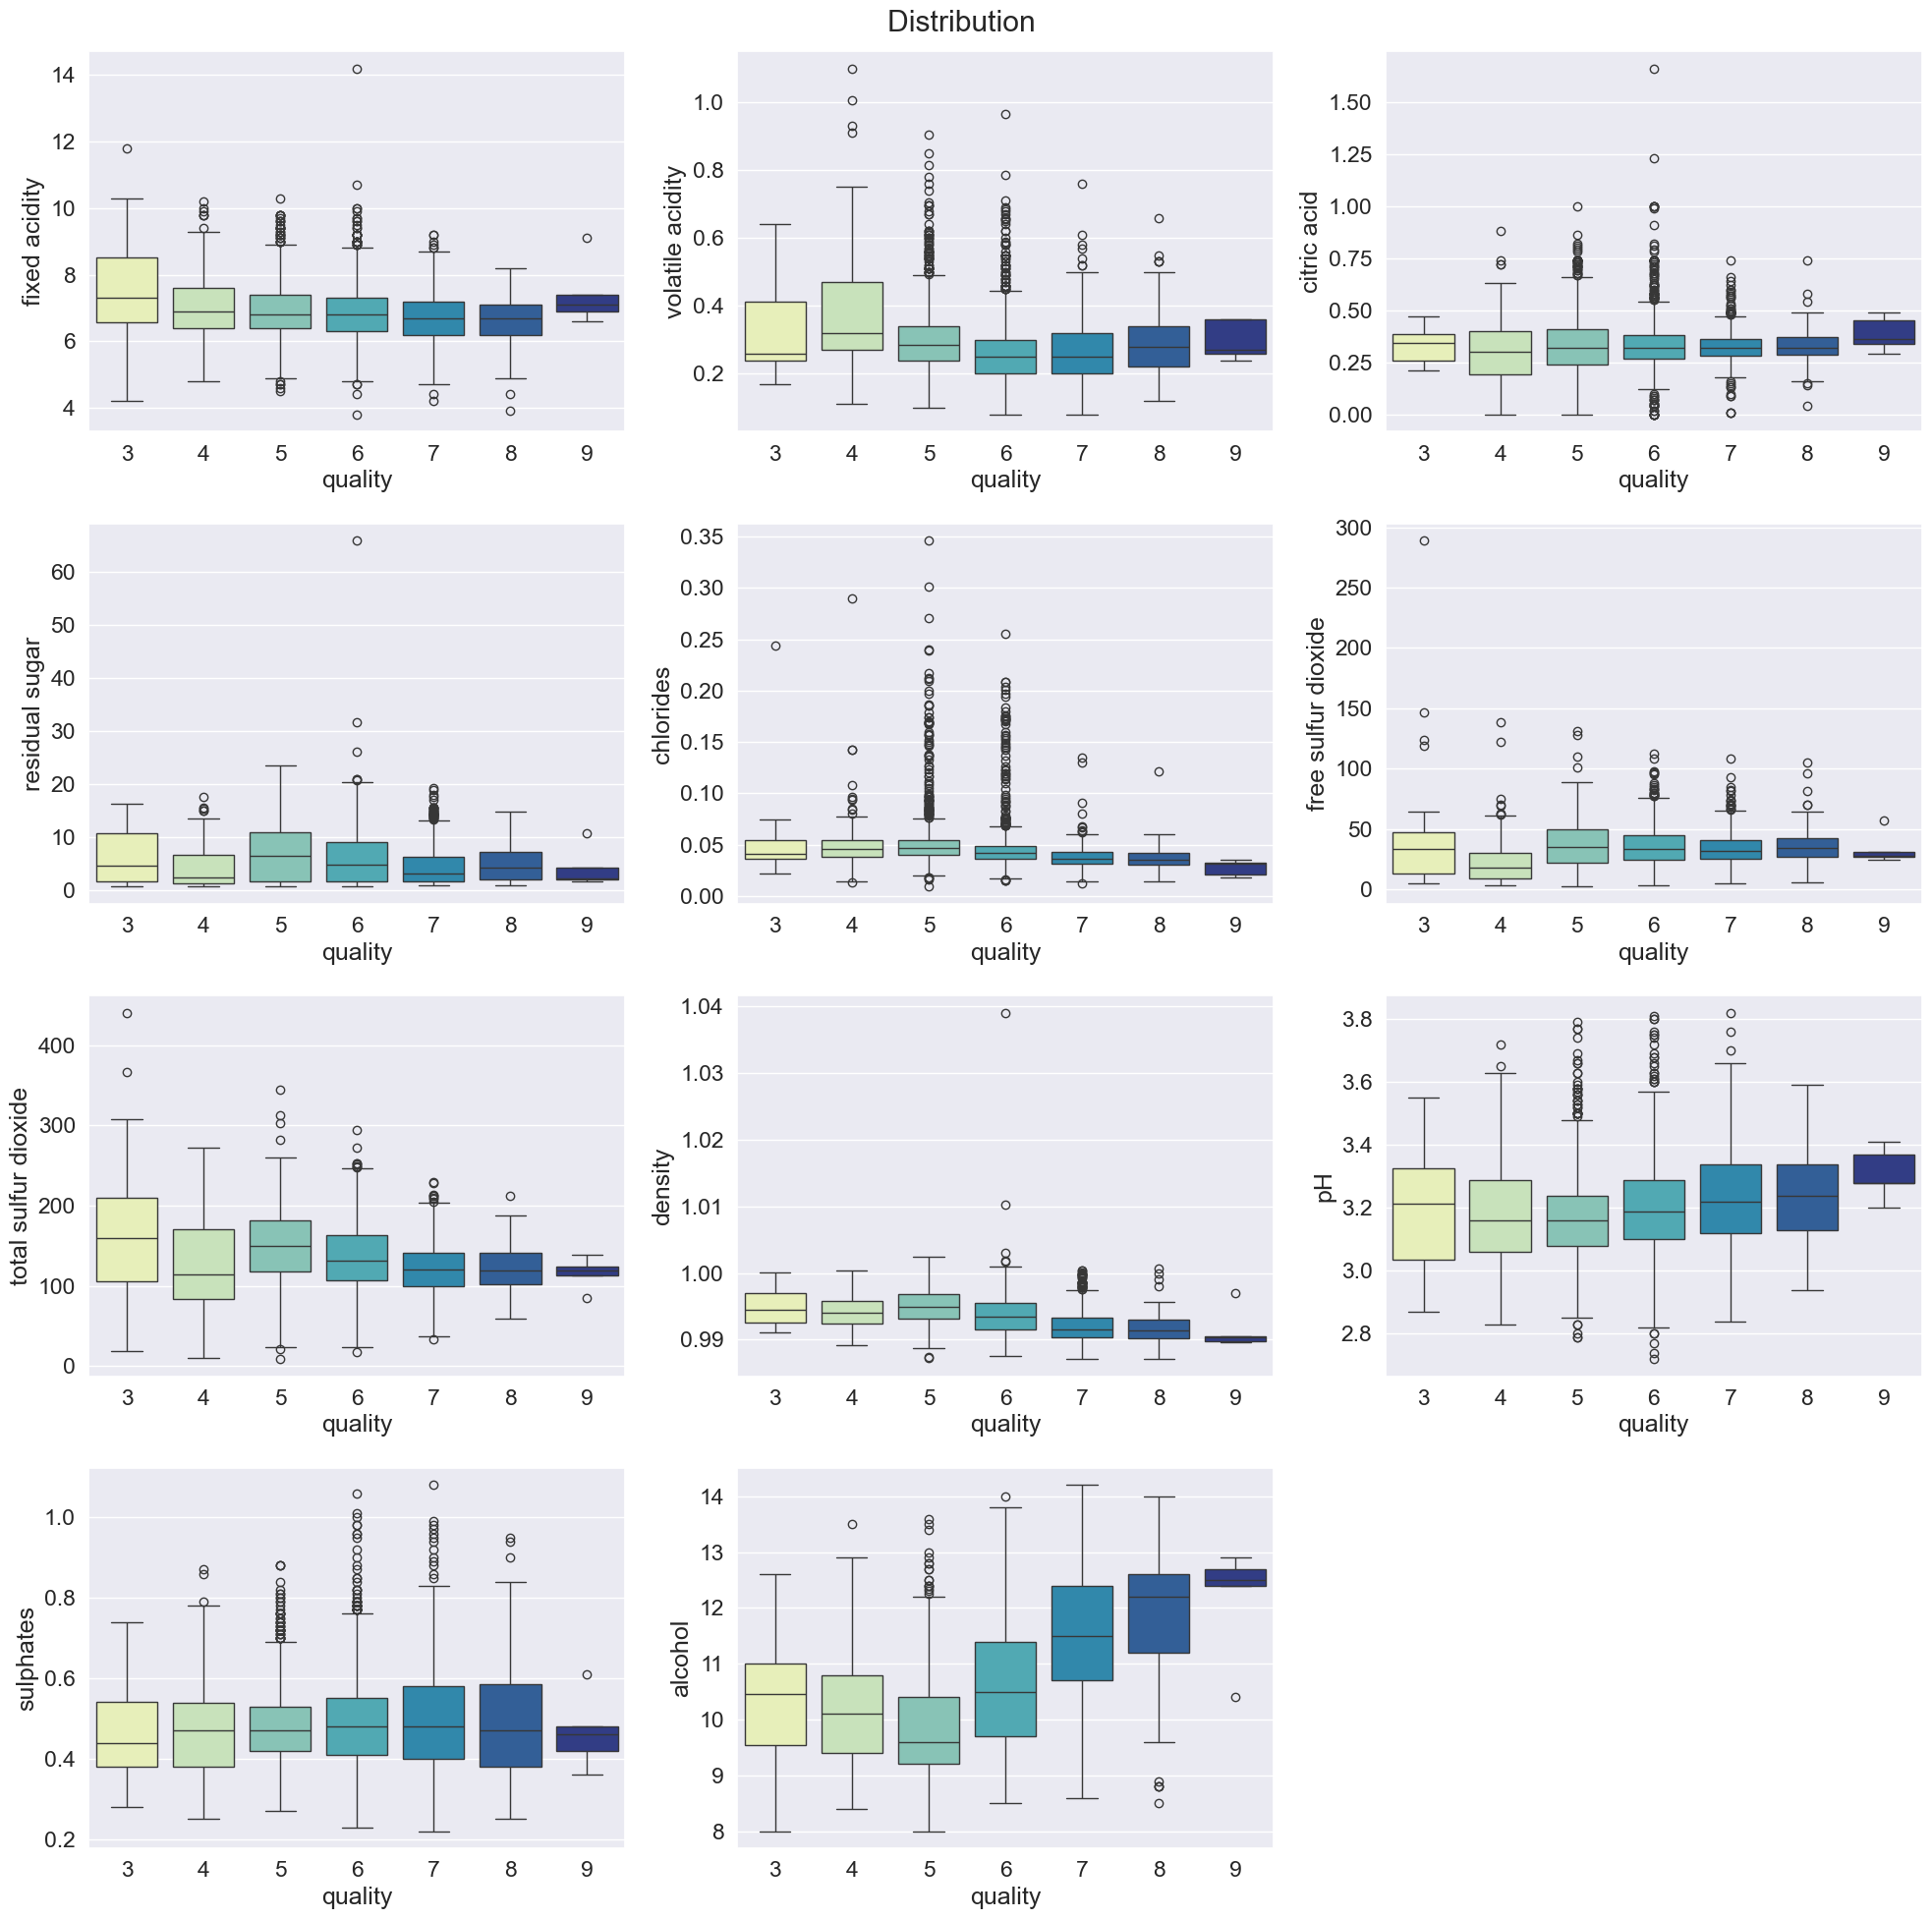

In [14]:
plt.figure(figsize=(20,20))
sns.set(font_scale = 1.5)

for i, col in enumerate(data.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data = data, x='quality', y=col, ax=ax, palette = 'YlGnBu')
    
plt.suptitle('Distribution ')
plt.tight_layout()

In [15]:
data['quality'] = data['quality'].astype('int')

corr = data.corr() 

print(corr['quality'].sort_values(ascending = False))

quality                 1.000000
alcohol                 0.462869
pH                      0.123829
sulphates               0.053200
free sulfur dioxide     0.010507
citric acid             0.007065
residual sugar         -0.117339
fixed acidity          -0.124636
total sulfur dioxide   -0.183356
volatile acidity       -0.190678
chlorides              -0.217739
density                -0.337805
Name: quality, dtype: float64


In [16]:
data_cols = ['fixed acidity','volatile acidity','citric acid','free sulfur dioxide',
             'total sulfur dioxide','chlorides','residual sugar','density','pH','sulphates','alcohol']

for col in data_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers_count = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
        

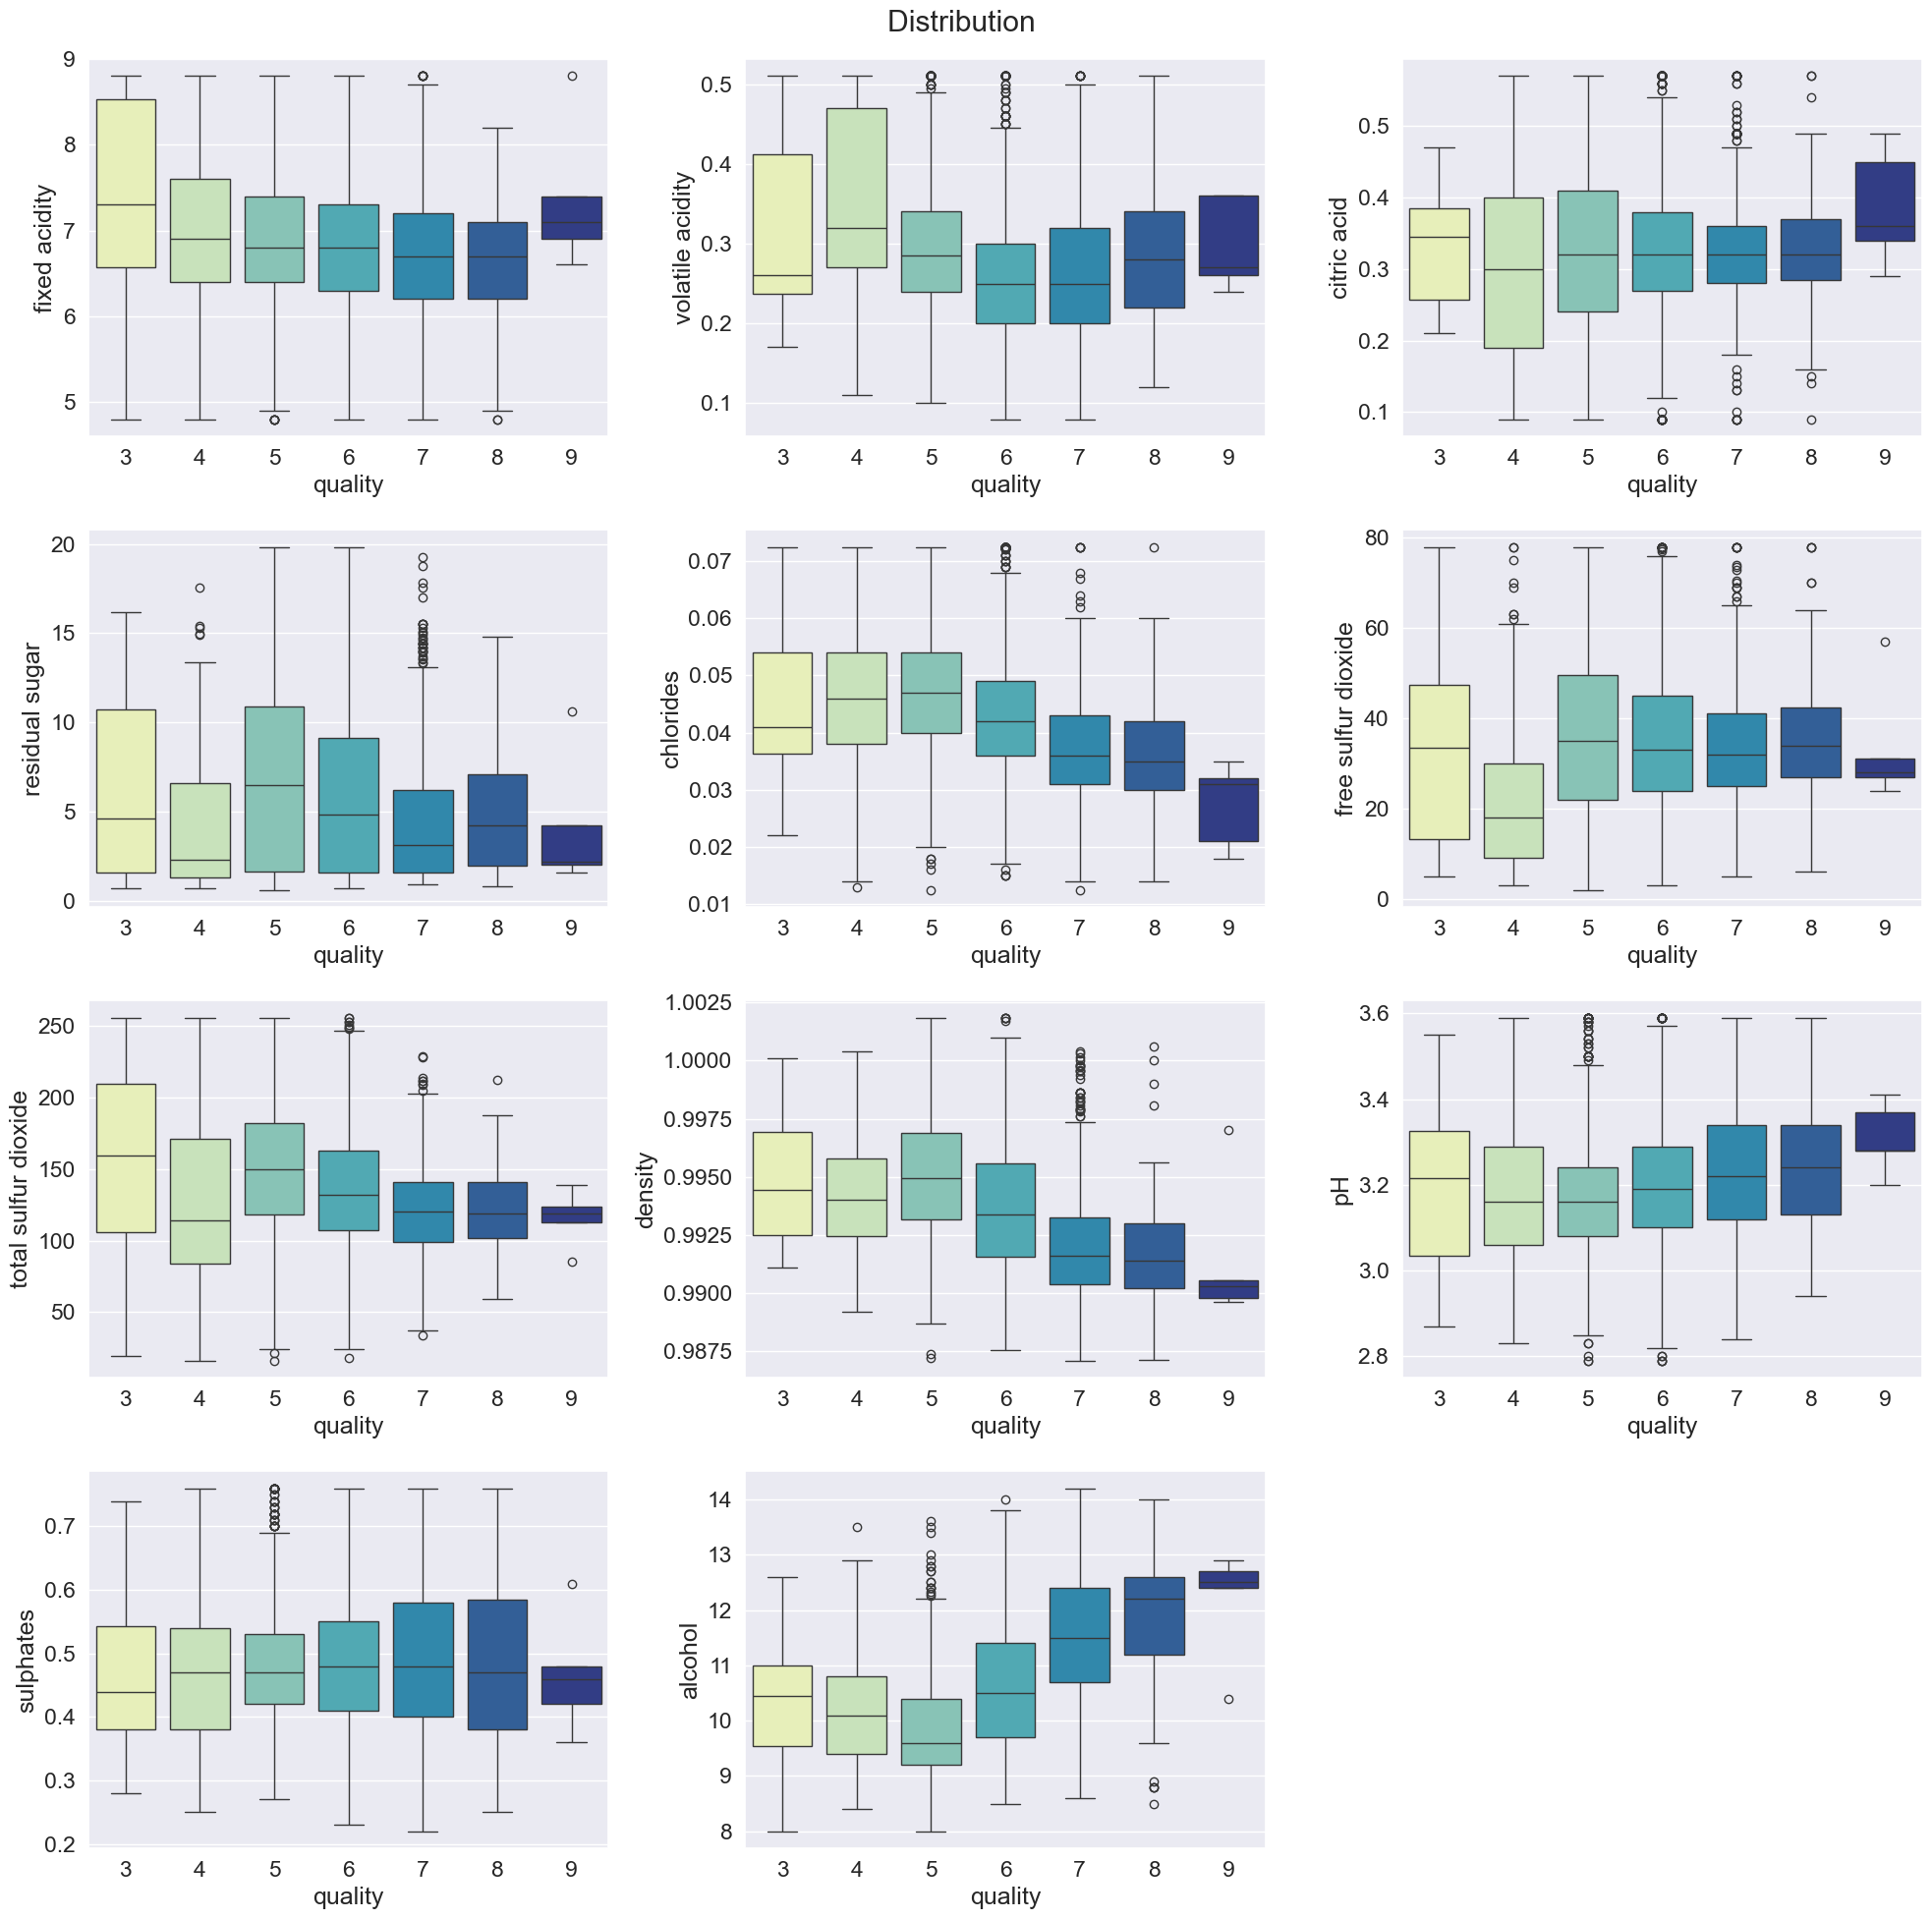

In [17]:
plt.figure(figsize=(20,20))
sns.set(font_scale = 1.5)

for i, col in enumerate(data.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data = data, x='quality', y=col, ax=ax, palette = 'YlGnBu')
    
plt.suptitle('Distribution ')
plt.tight_layout()

In [18]:
print("\nDistribution quality originale (3-9):")
print(data['quality'].value_counts().sort_index())


Distribution quality originale (3-9):
quality
3      20
4     153
5    1175
6    1788
7     689
8     131
9       5
Name: count, dtype: int64


In [19]:
# Pour plus de visibilité  créons divisons la variable cible en trois
# Mauvais (3-4-5) / Moyen (6) / Bon (7-8-9)

def categorize_quality(score):
    if score <= 5:
        return 0 
    elif score <= 6:
        return 1 
    else:
        return 2 

data['quality_category'] = data['quality'].apply(categorize_quality)

# Vérification de la distribution
print("\nDistribution quality_category:")
print(data['quality_category'].value_counts().sort_index())


Distribution quality_category:
quality_category
0    1348
1    1788
2     825
Name: count, dtype: int64


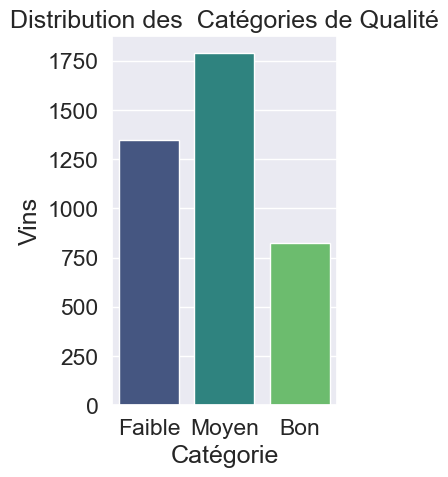

In [20]:
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='quality_category', palette='viridis')
plt.title('Distribution des  Catégories de Qualité')
plt.xlabel('Catégorie')
plt.ylabel('Vins')
plt.xticks(ticks=[0, 1, 2], labels=['Faible', 'Moyen', 'Bon'])
plt.show()

In [21]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.0,0.27,0.36,19.85,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2


In [22]:
#Sauvegarder en csv
data.to_csv("juice_data.csv",header=True, index=False)